In [19]:
# импортируем библиотеки
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array



In [33]:
# загружаем "IMDB Movie Review" данные, ограничим review 10000 самых известных используемых слов
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

# введем два класса
class_names = ["Отрицательная", "Положительная"]

In [34]:
# получим индекс слов из набора данных
# Обзоры в наборе данных IMDB были закодированы как последовательность целых чисел.
# Но набор данных также содержит указатель для преобразования отзывов в читаемую форму
word_index = tf.keras.datasets.imdb.get_word_index()

# введем маппинг для спец символов
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3


In [35]:
# создадим реверсивный индекс
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [36]:
# Рассмотрим DataInsights
allreviews = np.concatenate((x_train, x_test), axis=0)

print("Максимальное количество слов в отзыве: {}".format(len(max((allreviews), key=len))))
print("Максимальное количество слов в отзыве: {}".format(len(min((allreviews), key=len))))

result = [len(x) for x in allreviews]
print("Средняя длина отзыва: {}".format(np.mean(result)))

print("")
print("Машинный вид отзыва")
print("  Отзыв: " + str(x_train[60]))
print("  Эмоция: " + str(y_train[60]))

print("")
print("Отзыв")
print("  Отзыв: " + decode_review(x_train[60]))
print("  Эмоция: " + class_names[y_train[60]])

Максимальное количество слов в отзыве: 2494
Максимальное количество слов в отзыве: 7
Средняя длина отзыва: 234.75892

Машинный вид отзыва
  Отзыв: [1, 13, 219, 14, 33, 4, 2, 22, 1413, 12, 16, 373, 175, 2711, 1115, 1026, 430, 939, 16, 23, 2444, 25, 43, 697, 89, 12, 16, 170, 8, 130, 262, 19, 32, 4, 665, 7, 4, 2, 322, 5, 4, 1520, 7, 4, 86, 250, 10, 10, 4, 249, 173, 16, 4, 3891, 6, 19, 4, 167, 564, 5, 564, 1325, 36, 805, 8, 216, 638, 17, 2, 21, 25, 100, 376, 507, 4, 2110, 15, 79, 125, 23, 567, 13, 2134, 233, 36, 4852, 2, 5, 81, 1672, 10, 10, 92, 437, 129, 58, 13, 69, 8, 401, 61, 1432, 39, 1286, 46, 7, 12]
  Эмоция: 0

Отзыв
  Отзыв: <START> i saw this at the <UNKNOWN> film festival it was awful every clichéd violent rich boy fantasy was on display you just knew how it was going to end especially with all the shots of the <UNKNOWN> wife and the rape of the first girl br br the worst part was the q a with the director writer and writer producer they tried to come across as <UNKNOWN> but you 

In [38]:
# Нам нужно убедиться, что наши обзоры имеют одинаковую длину. Это для параметров LSTM.
# Некоторые отзывы нужно будет усечь, а другие дополнить.
review_length = 250

x_train = sequence.pad_sequences(x_train, maxlen = review_length,padding='post')
x_test = sequence.pad_sequences(x_test, maxlen = review_length,padding='post')

# Дополняем короткие отзывы символом PAD в конце
print("")
print("Пример обзора (добавление  PAD): " + decode_review(x_train[60]))


Пример обзора (добавление  PAD): <START> i saw this at the <UNKNOWN> film festival it was awful every clichéd violent rich boy fantasy was on display you just knew how it was going to end especially with all the shots of the <UNKNOWN> wife and the rape of the first girl br br the worst part was the q a with the director writer and writer producer they tried to come across as <UNKNOWN> but you could tell they're the types that get off on violence i bet anything they frequent <UNKNOWN> and do drugs br br don't waste your time i had to keep my boyfriend from walking out of it <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

In [40]:
#tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=32))

In [42]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # размер словаря
        output_dim = 32, 
        input_length = review_length 
    )
)

# слой Dropout 
model.add(
    tf.keras.layers.Dropout(
        rate=0.2 # рандомно отключаем 20% нейронов
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 
    )
)

# слой Dropout 
model.add(
    tf.keras.layers.Dropout(
        rate=0.2 # рандомно отключаем 20% нейронов
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1, 
        activation='sigmoid'
    )
)


model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']) 


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 32)           320000    
                                                                 
 dropout_4 (Dropout)         (None, 250, 32)           0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


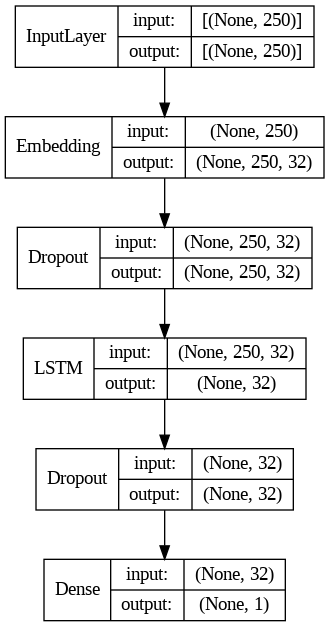

In [43]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [44]:
# Обучение
history = model.fit(
    x_train, y_train,                   
    batch_size=128, 
    epochs=3, 
    validation_split=0.2,    
    verbose=1
) 

Epoch 1/3
157/157 [==============================] - 28s 161ms/step - loss: 0.7012 - accuracy: 0.5353 - val_loss: 0.6418 - val_accuracy: 0.7282
Epoch 2/3
157/157 [==============================] - 22s 141ms/step - loss: 0.6228 - accuracy: 0.6996 - val_loss: 0.5769 - val_accuracy: 0.7520
Epoch 3/3
157/157 [==============================] - 12s 79ms/step - loss: 0.6271 - accuracy: 0.6537 - val_loss: 0.5382 - val_accuracy: 0.7640


In [45]:
# определение качества модели
model.evaluate(x_test,y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.5465 - accuracy: 0.7543


[0.54654461145401, 0.7543200254440308]

In [46]:
from sklearn.metrics import classification_report
predicted_classes = np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test, predicted_classes, target_names=class_names))

782/782 [==============================] - 4s 4ms/step
               precision    recall  f1-score   support

Отрицательная       0.50      1.00      0.67     12500
Положительная       0.00      0.00      0.00     12500

     accuracy                           0.50     25000
    macro avg       0.25      0.50      0.33     25000
 weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
# Выведем несколько примеров некорретных отзывов
predicted_classes_reshaped = np.reshape(predicted_classes, 25000)

incorrect = np.nonzero(predicted_classes_reshaped!=y_test)[0]

for j, incorrect in enumerate(incorrect[0:20]):
    
    predicted = class_names[predicted_classes_reshaped[incorrect]]
    actual = class_names[y_test[incorrect]]
    human_readable_review = decode_review(x_test[incorrect])
    
    print("Неправильно классифицированный отзыв из Test ["+ str(j+1) +"]") 
    print("Test отзыв #" + str(incorrect)  + ": Предсказания ["+ predicted + "] Актуальность ["+ actual + "]")
    print("Текст отзыва Test: " + human_readable_review.replace("<PAD> ", ""))
    print("")

Неправильно классифицированный отзыв из Test [1]
Test отзыв #1: Предсказания [Отрицательная] Актуальность [Положительная]
Текст отзыва Test: focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances <UNKNOWN> the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere <UNKNOWN> with sexual tension and psychological <UNKNOWN> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the <UNKNOWN> moody set fits the content of the story very well in 

In [56]:
# review = "<START> this was a terrible film with too much violence"
# review = "<START> this is the best film i have ever seen it is great and fantastic and i loved it"
#review = "<START> i dont think this movie is bad or good"
review = "<START> i think this movie is best"

tmp = []
for word in review.split(" "):
    tmp.append(word_index[word])

tmp_padded = sequence.pad_sequences([tmp], maxlen=review_length,padding='post') 

rawprediction = model.predict(array([tmp_padded][0]))[0][0]
prediction = int(round(rawprediction))

print("Отзыв: " + review)
print("Прогноз: " + str(rawprediction))
print("Классификация: " + class_names[prediction])

1/1 [==============================] - 0s 24ms/step
Отзыв: <START> i think this movie is best
Прогноз: 0.7613288
Классификация: Положительная
